This notebook validates CCL with CAMB

In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pyccl as ccl
plt.style.use("seaborn-notebook")

#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.1.3 installed at /home/tanveer/anaconda3/lib/python3.7/site-packages/camb


In [2]:
ell = np.arange(0, 1501, 1)
lmin = 100
lmax = 1501
fs = 15

In [20]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()

pars.set_cosmology(H0=67.0, ombh2=0.02216, omch2=0.1203, mnu=0.06, tau=0.06)
pars.InitPower.set_params(As=2.119e-9, ns=0.964)
pars.set_for_lmax(1500, lens_potential_accuracy=1);

#calculate results for these parameters
results = camb.get_results(pars)
cl_camb = results.get_lens_potential_cls(lmax=1500)

Text(0.5, 1.0, 'CMB Lensing from CAMB')

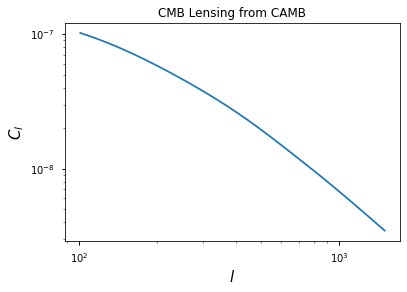

In [21]:
plt.loglog(ell[ell > lmin], cl_camb[:,0][ell > lmin])
plt.ylabel(r"$C_l$", fontsize = fs)
plt.xlabel(r"$l$", fontsize = fs)
plt.title("CMB Lensing from CAMB")

In [28]:
#calculate C_ls from CCL

cosmo = ccl.Cosmology(Omega_c = 0.268, Omega_b = 0.04937,
        h = 0.670, n_s = 0.964, A_s = 2.119e-9,
        transfer_function='boltzmann_camb') 

cmbl = ccl.CMBLensingTracer(cosmo, z_source=1090.)
cl_ccl = ccl.angular_cl(cosmo, cmbl, cmbl, ell)

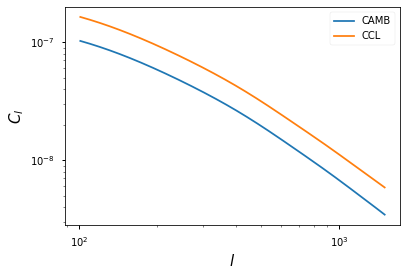

In [32]:
plt.loglog(ell[ell > lmin], cl_camb[:,0][ell > lmin], label = 'CAMB')
plt.loglog(ell[ell > lmin], cl_ccl[ell > lmin], label = 'CCL')
plt.ylabel(r"$C_l$", fontsize = fs)
plt.xlabel(r"$l$", fontsize = fs)
plt.legend(loc = 'best')

Note: CAMB and CCL are off? 

In [8]:
#Import Planck reconstructed noise and signal

nlkk = np.genfromtxt("data/MV/nlkk.dat")
ell_planck = nlkk[:,0]
N_l = nlkk[:,1]
C_lplusN_l = nlkk[:,2]

/home/tanveer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/tanveer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/tanveer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


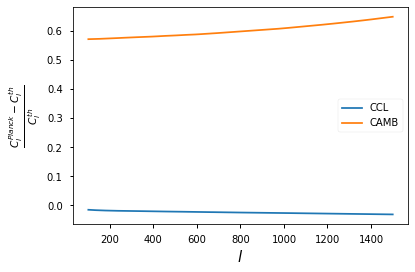

In [12]:
plt.plot(ell[ell > lmin], ((C_lplusN_l - N_l)[ell_planck < lmax]/cl_ccl- 1)[ell > lmin], label = "CCL")
plt.plot(ell[ell > lmin], ((C_lplusN_l - N_l)[ell_planck < lmax]/cl_camb[:,0] - 1)[ell > lmin], label = "CAMB")
plt.ylabel(r"$\frac{C^{Planck}_{l} - C^{th}_{l}}{C^{th}_{l}}$", fontsize = fs)
plt.xlabel(r'$l$', fontsize = fs)
plt.legend(loc = 'best')

/home/tanveer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/tanveer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Text(0.5, 0, '$l$')

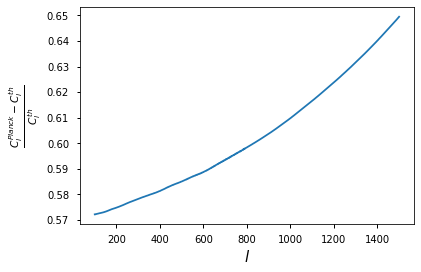

In [13]:
plt.plot(ell[ell > lmin], ((C_lplusN_l - N_l)[ell_planck < lmax]/cl_camb[:,0] - 1)[ell > lmin])
plt.ylabel(r"$\frac{C^{Planck}_{l} - C^{th}_{l}}{C^{th}_{l}}$", fontsize = fs)
plt.xlabel(r'$l$', fontsize = fs)